### Dataset

Car Evaluation Data: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation 

* Rows: 1728
* Features: 7
* Target Feature: class



### Loading the Following Libraries & Data



In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
import graphviz
from graphviz import Source
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree
from sklearn.metrics import recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report, f1_score

In [18]:
data = pd.read_csv("..\Section_5_Machine_Learning\data\car.data",header=None)
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [19]:
# Changing column names for betterment
col_names = ['buying_price','maintenance','no_of_doors','no_of_persons','lug_boot_size','safety','class']
data.columns = col_names
data.head()

,buying_price,maintenance,no_of_doors,no_of_persons,lug_boot_size,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying_price   1728 non-null   object
 1   maintenance    1728 non-null   object
 2   no_of_doors    1728 non-null   object
 3   no_of_persons  1728 non-null   object
 4   lug_boot_size  1728 non-null   object
 5   safety         1728 non-null   object
 6   class          1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [21]:
def show(data):
  for i in data.columns[1:]:
    print("Feature: {} with {} Levels".format(i,data[i].unique()))

show(data)

Feature: maintenance with ['vhigh' 'high' 'med' 'low'] Levels
Feature: no_of_doors with ['2' '3' '4' '5more'] Levels
Feature: no_of_persons with ['2' '4' 'more'] Levels
Feature: lug_boot_size with ['small' 'med' 'big'] Levels
Feature: safety with ['low' 'med' 'high'] Levels
Feature: class with ['unacc' 'acc' 'vgood' 'good'] Levels


In [22]:
data.isnull().sum() 

buying_price     0
maintenance      0
no_of_doors      0
no_of_persons    0
lug_boot_size    0
safety           0
class            0
dtype: int64

### Feature Engineering

In [23]:
data.dtypes

buying_price     object
maintenance      object
no_of_doors      object
no_of_persons    object
lug_boot_size    object
safety           object
class            object
dtype: object

In [24]:
encoder = ce.OrdinalEncoder(cols = ['buying_price','maintenance','no_of_doors','no_of_persons','lug_boot_size','safety','class'])
newdata = encoder.fit_transform(data)
newdata.head()

,buying_price,maintenance,no_of_doors,no_of_persons,lug_boot_size,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


### Splitting Data into Train Test

In [25]:
x = newdata.drop(['class'], axis = 1)
y = newdata['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print("X_train: {}".format(x_train.shape))
print("X_test: {}".format(x_test.shape))
print("Y_train: {}".format(y_train.shape))
print("Y_test: {}".format(y_test.shape))

X_train: (1209, 6)
X_test: (519, 6)
Y_train: (1209,)
Y_test: (519,)


### Data Modeling

##### Creating Evaluation Parametric Function

In [26]:
def evaluation_parametrics(y_train,yp_train,y_test,yp_test):
  print("--------------------------------------------------------------------------")
  print("Classification Report for Train Data")
  print(classification_report(y_train, yp_train))
  print("Classification Report for Test Data")
  print(classification_report(y_test, yp_test))
  print("--------------------------------------------------------------------------")
  # Accuracy
  print("Accuracy on Train Data is: {}".format(round(accuracy_score(y_train,yp_train),2)))
  print("Accuracy on Test Data is: {}".format(round(accuracy_score(y_test,yp_test),2)))
  print("--------------------------------------------------------------------------")
  # Precision
  print("Precision on Train Data is: {}".format(round(precision_score(y_train,yp_train,average = "weighted"),2)))
  print("Precision on Test Data is: {}".format(round(precision_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # Recall 
  print("Recall on Train Data is: {}".format(round(recall_score(y_train,yp_train,average = "weighted"),2)))
  print("Recall on Test Data is: {}".format(round(recall_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # F1 Score
  print("F1 Score on Train Data is: {}".format(round(f1_score(y_train,yp_train,average = "weighted"),2)))
  print("F1 Score on Test Data is: {}".format(round(f1_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")

##### 1. Logistics Regression

In [27]:
lr = LogisticRegression(max_iter = 1000,random_state = 48)
lr.fit(x_train,y_train)

yp_train = lr.predict(x_train)
yp_test = lr.predict(x_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.88      0.93      0.90       852
           2       0.66      0.58      0.62       266
           3       0.79      0.63      0.70        41
           4       0.53      0.38      0.44        50

    accuracy                           0.82      1209
   macro avg       0.71      0.63      0.67      1209
weighted avg       0.81      0.82      0.82      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.87      0.93      0.90       358
           2       0.66      0.58      0.62       118
           3       0.75      0.75      0.75        24
           4       0.55      0.32      0.40        19

    accuracy                           0.82       519
   macro avg       0.71      0.64      0.67       519
weighted avg       0.81      0.82    

##### 2. Decision Tree

In [28]:
dt = DecisionTreeClassifier(max_depth = 7,random_state = 48) # Keeping max_depth = 7 to avoid overfitting
dt.fit(x_train,y_train)

yp_train = dt.predict(x_train)
yp_test = dt.predict(x_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.98      0.97      0.98       852
           2       0.86      0.94      0.90       266
           3       0.93      0.68      0.79        41
           4       0.81      0.76      0.78        50

    accuracy                           0.95      1209
   macro avg       0.90      0.84      0.86      1209
weighted avg       0.95      0.95      0.95      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       358
           2       0.86      0.81      0.83       118
           3       0.77      0.83      0.80        24
           4       0.52      0.58      0.55        19

    accuracy                           0.92       519
   macro avg       0.78      0.80      0.79       519
weighted avg       0.92      0.92    

##### 3. Random Forest

In [29]:
rf = RandomForestClassifier(max_depth = 7,random_state = 48) # Keeping max_depth = 7 same as DT
rf.fit(x_train,y_train)

yp_train = rf.predict(x_train)
yp_test = rf.predict(x_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       852
           2       0.88      0.98      0.93       266
           3       0.97      0.76      0.85        41
           4       0.97      0.74      0.84        50

    accuracy                           0.97      1209
   macro avg       0.96      0.86      0.90      1209
weighted avg       0.97      0.97      0.97      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.98      0.97      0.98       358
           2       0.85      0.89      0.87       118
           3       0.88      0.88      0.88        24
           4       0.69      0.58      0.63        19

    accuracy                           0.94       519
   macro avg       0.85      0.83      0.84       519
weighted avg       0.94      0.94    

<h2> Prediction - This Dataset was trained using Class as Tgt Variable - let us now predict buying price. </h2>


In [30]:
filter = data['maintenance'] == 'high'
filter1 = data['no_of_doors'] == '4'
filter2 = data['lug_boot_size'] == 'big'
filter3= data['safety'] == 'high'
filter4 = data['class'] == 'good'
filter5 = data['class'] == 'vgood'


#We must exclude the last feature as the last variable is a missing factor 

filtereddata = data.where(filter& filter1 & filter2&filter3&filter5) 
filtereddata.dropna(inplace = True)

filterencoder = ce.OrdinalEncoder(cols = ['buying_price','maintenance','no_of_doors','no_of_persons','lug_boot_size','safety','class'])
unseen = filterencoder.fit_transform(filtereddata)

unseen.drop(['class'],axis =1,inplace=True)

print(rf.predict(unseen))


[1 1]


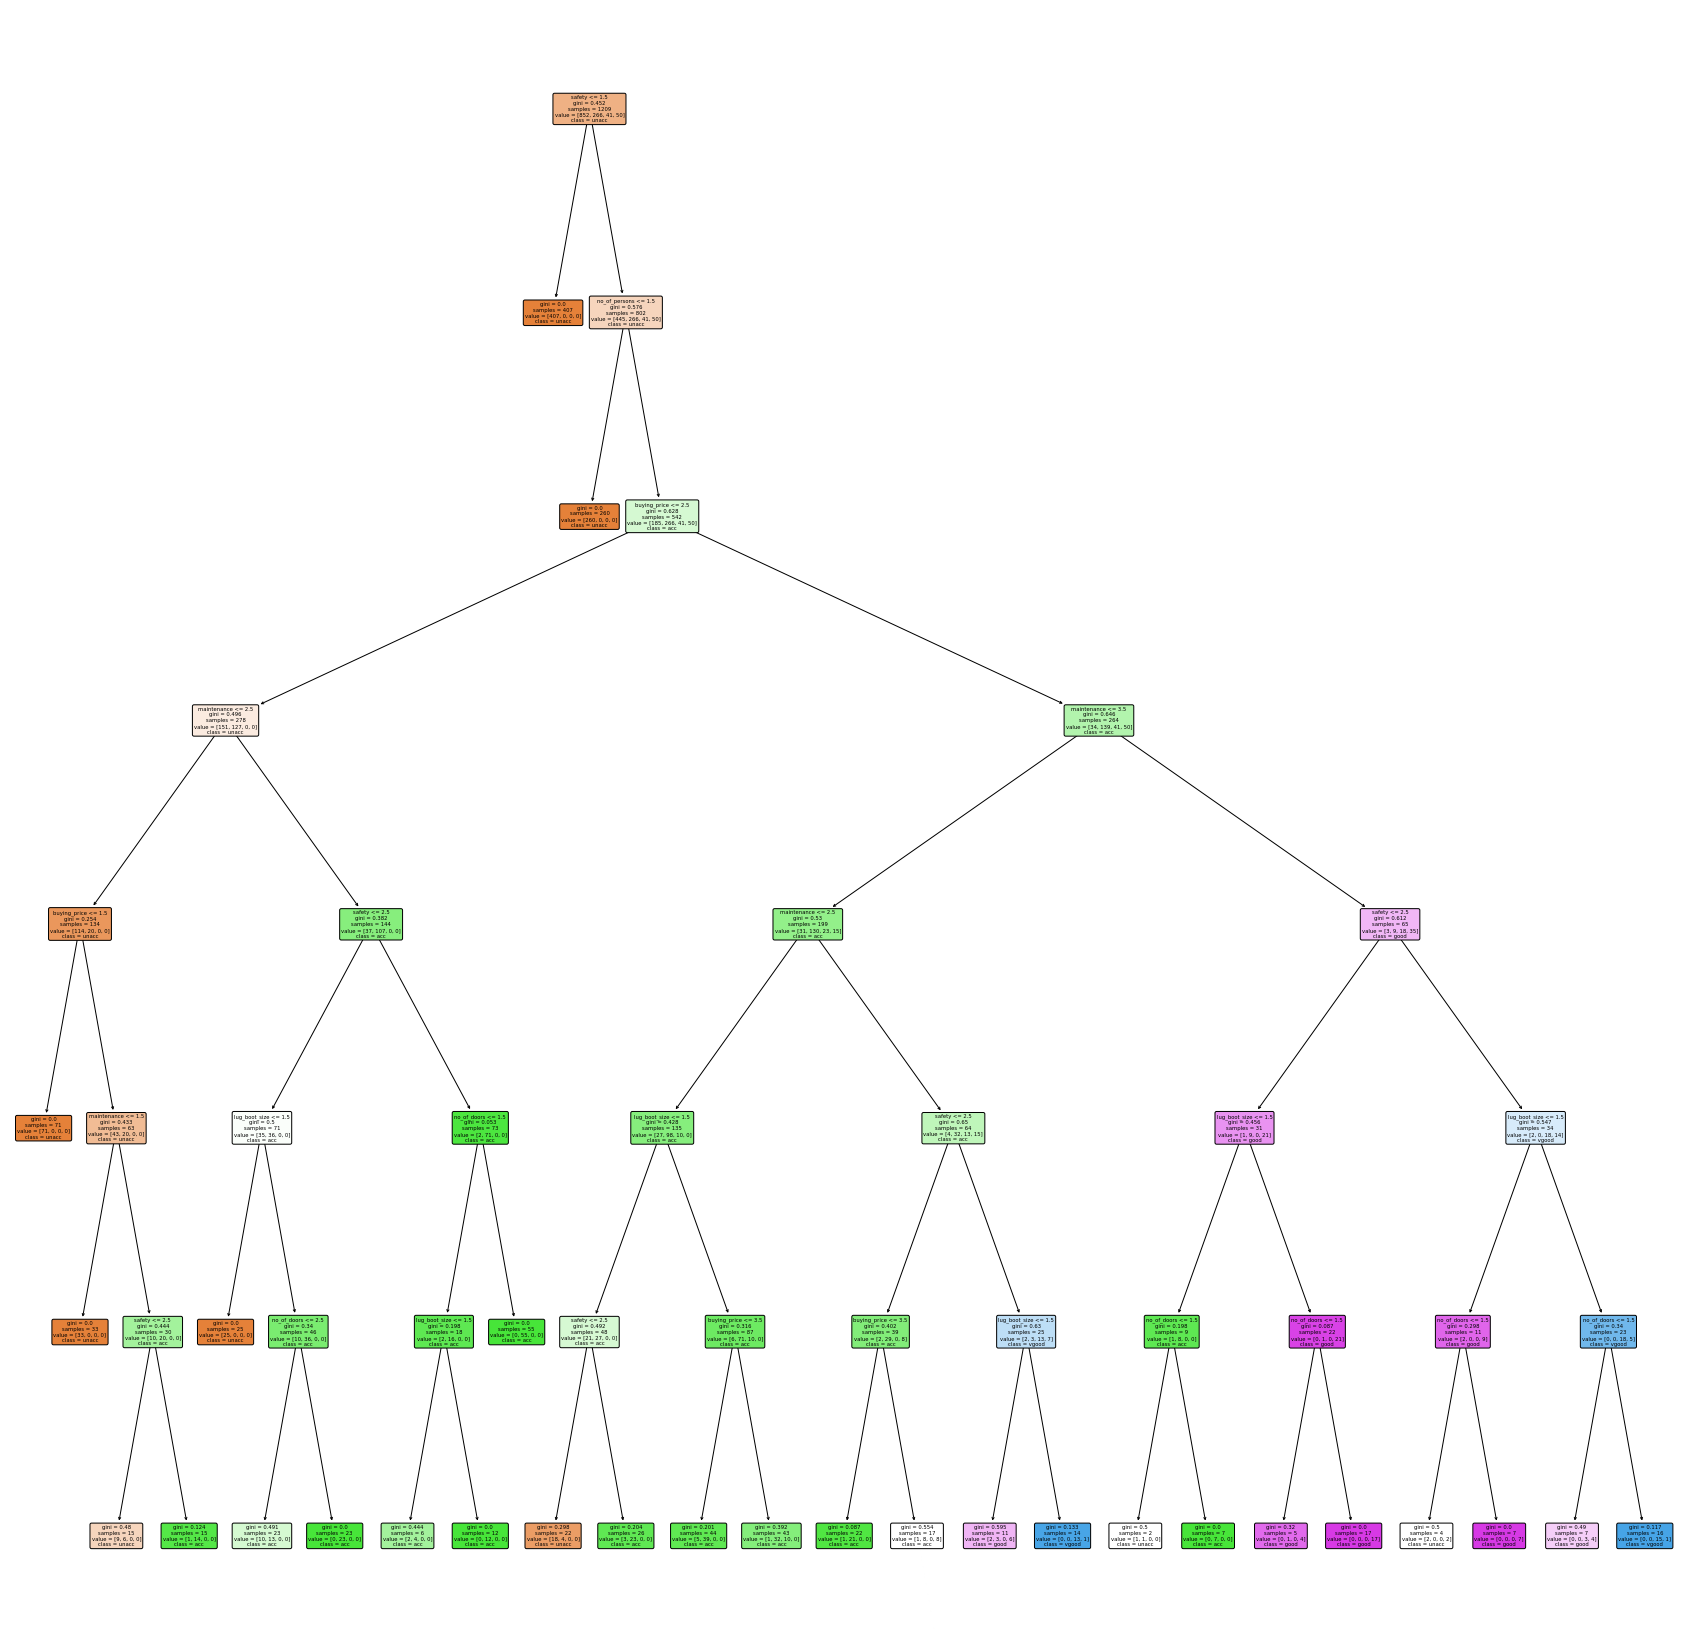

In [36]:
plt.figure(figsize=(30,30))  # set plot size (denoted in inches)
plot = tree.plot_tree(dt, 
                   feature_names=['buying_price','maintenance','no_of_doors','no_of_persons','lug_boot_size','safety'],  
                   class_names=['unacc' ,'acc', 'vgood', 'good'],
                   rounded = True,
                   filled=True)

In [44]:
predictions = rf.predict_proba([[1,1,1,1,1,1],[1,0,1,0,1,0],[1,0,0,0,0,0]])
print(predictions)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
